In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Basic incidents details 2022 - 4326.csv')
df.head(3)

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_3690/1011316928.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Basic incidents details 2022 - 4326.csv')


,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
0,1,F22017150,Medical,Medical,94 - Other Public Service,0,03 - From Ambulance,225,20,20.0,M1L,2022-02-05T04:04:47,2022-02-05T04:12:32,2022-02-05T04:23:15,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
1,2,F22124543,Medical,Medical,Medical,0,03 - From Ambulance,244,22,22.0,M1W,2022-09-16T22:22:08,2022-09-16T22:34:38,2022-09-16T23:12:27,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
2,3,F22133289,FIG - Fire - Grass/Rubbish,Emergency Fire,23 - Open air burning/unauthorized controlled ...,0,07 - Verbal Report to Station (in person),133,5,5.0,Wickford Dr / Wyndale Dr,2022-10-03T21:13:54,2022-10-03T21:15:17,2022-10-03T21:18:19,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.47..."


In [4]:
# Count missing values for each column.
missing_values = df.isnull().sum()
print(missing_values)

_id                               0
INCIDENT_NUMBER                   0
Initial_CAD_Event_Type            0
Initial_CAD_Event_Call_Type       0
Final_Incident_Type               7
Event_Alarm_Level                 0
Call_Source                       7
Incident_Station_Area             0
Incident_Ward                     0
Ward_At_Event_Dispatch            1
Intersection                      0
TFS_Alarm_Time                    0
TFS_Arrival_Time               5763
Last_TFS_Unit_Clear_Time          0
Persons_Rescued                   7
geometry                          0
dtype: int64


In [5]:
# Convert time data to datetime format.
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])
df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(df['Last_TFS_Unit_Clear_Time'])

In [6]:
# Fill null datetime data with average of entire column.
df['TFS_Arrival_Time'].fillna(df['TFS_Arrival_Time'].mean(),inplace=True)

In [8]:
# Display all rows that have a null value in them.
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
19155,19156,F22077018,Medical,Medical,NaN,0,NaN,241,22,22.0,M1W,2022-06-17 13:55:14,2022-06-17 14:03:02.000000000,2022-06-17 14:42:07,NaN,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
22457,22458,F22009278,CCNE - Check Call - Non Emergency,Non Emergency,NaN,0,NaN,134,8,8.0,Orchard View Blvd / Edith Dr,2022-01-19 10:28:23,2022-01-19 10:31:10.000000000,2022-01-19 10:39:33,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.40..."
68351,68352,F22024465,Medical,Medical,NaN,0,NaN,314,13,13.0,M5B,2022-02-22 15:39:53,2022-07-06 23:46:58.562583552,2022-02-22 15:40:33,NaN,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
80409,80410,F22133498,FIG - Fire - Grass/Rubbish,Emergency Fire,NaN,0,NaN,225,20,20.0,Lakewood Ave / Fishleigh Dr,2022-10-04 10:10:25,2022-10-04 10:19:28.000000000,2022-10-04 10:59:38,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.24..."
92284,92285,F22065590,Medical,Medical,NaN,0,NaN,142,7,7.0,M3N,2022-05-25 16:23:39,2022-07-06 23:46:58.562583552,2022-05-25 16:26:15,NaN,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
106424,106425,F22152131,CC - Check Call,Other Emergency Events,NaN,0,NaN,215,25,25.0,Kirkdene Dr / Jaybell Grv,2022-11-10 09:35:46,2022-11-10 09:37:46.000000000,2022-11-10 16:41:28,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.13..."
119111,119112,F23000001,FAHR - Alarm Highrise Residential,Emergency Fire,24 - Other Cooking/toasting/smoke/steam (No Fire),0,05 - Telephone from Monitoring Agency,433,3,NaN,Shore Breeze Dr / Annie Craig Dr,2022-12-31 23:59:46,2023-01-01 00:05:58.000000000,2023-01-01 00:31:26,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.47..."
124813,124814,F22142400,VEPI - Vehicle - Personal Injury,Vehicle Incident,NaN,0,NaN,345,9,9.0,Dufferin St / Lappin Ave,2022-10-22 13:20:39,2022-10-22 13:22:11.000000000,2022-10-22 13:22:29,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.43..."


In [9]:
# All rows with a null value have an Event_Alarm_Level of 0, therefore it is safe to drop all these rows.
df.dropna(inplace=True)

In [10]:
# Create new columns where TFS_Alarm_Time is further divided into Hour, Month, and Day of Week.
df['Hour'] = df['TFS_Alarm_Time'].apply(lambda time: time.hour)
df['Month'] = df['TFS_Alarm_Time'].apply(lambda time: time.month)
df['Day of Week'] = df['TFS_Alarm_Time'].apply(lambda time: time.dayofweek)

In [11]:
df.head(3)

,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry,Hour,Month,Day of Week
0,1,F22017150,Medical,Medical,94 - Other Public Service,0,03 - From Ambulance,225,20,20.0,M1L,2022-02-05 04:04:47,2022-02-05 04:12:32,2022-02-05 04:23:15,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}",4,2,5
1,2,F22124543,Medical,Medical,Medical,0,03 - From Ambulance,244,22,22.0,M1W,2022-09-16 22:22:08,2022-09-16 22:34:38,2022-09-16 23:12:27,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}",22,9,4
2,3,F22133289,FIG - Fire - Grass/Rubbish,Emergency Fire,23 - Open air burning/unauthorized controlled ...,0,07 - Verbal Report to Station (in person),133,5,5.0,Wickford Dr / Wyndale Dr,2022-10-03 21:13:54,2022-10-03 21:15:17,2022-10-03 21:18:19,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.47...",21,10,0


In [12]:
# Replace integer value for day of week with their respective three letter abbreviations.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [13]:
# Create a new database called dayHour which tells you number of incidents. 
dayHour = df.groupby(by=['Day of Week','Hour']).count()['TFS_Alarm_Time'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,848,753,594,574,519,548,616,693,946,1128,...,1273,1250,1333,1325,1333,1368,1236,1260,1153,1076
Mon,795,703,631,541,506,506,635,803,978,1142,...,1213,1288,1249,1261,1352,1249,1143,1115,1029,897
Sat,1076,935,870,745,605,609,637,658,771,924,...,1372,1348,1323,1259,1348,1401,1342,1264,1216,1229
Sun,1080,906,849,817,659,619,608,688,791,892,...,1152,1145,1203,1172,1250,1266,1152,1164,1070,950
Thu,781,630,544,532,465,510,596,715,929,1164,...,1247,1302,1301,1296,1355,1301,1251,1101,1117,926
Tue,758,614,549,488,457,476,532,722,961,1143,...,1240,1310,1228,1257,1325,1245,1095,1123,963,908
Wed,729,629,536,501,457,467,596,695,945,1099,...,1269,1212,1270,1276,1299,1310,1178,1086,1053,932


<Axes: xlabel='Hour', ylabel='Day of Week'>

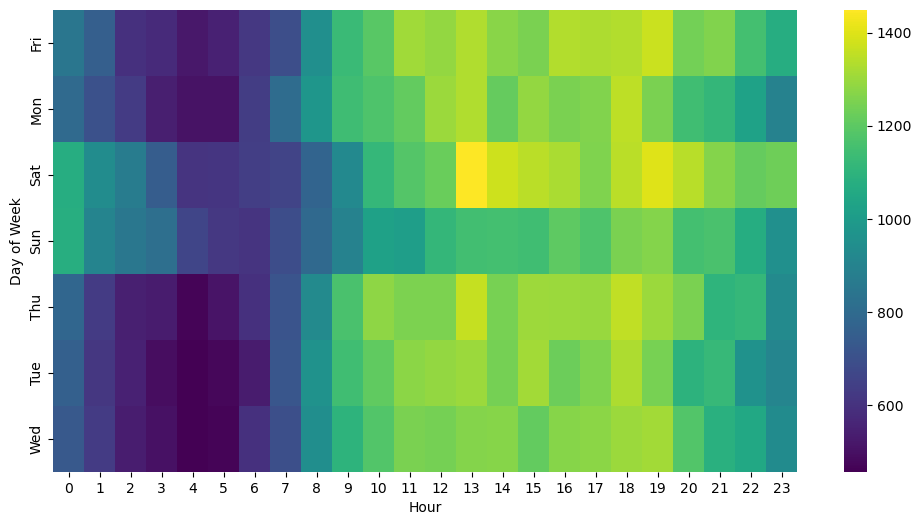

In [14]:
# Create a heatmap for incident frequency by day and hour.
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [15]:
# Reorder the rows in dayHour based on the proper order of days in the week.
dayOrder = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']
dayHour = dayHour.reindex(dayOrder)

<Axes: title={'center': 'Incident Frequency by Day of the Week and Hour'}, xlabel='Hour', ylabel='Day of Week'>

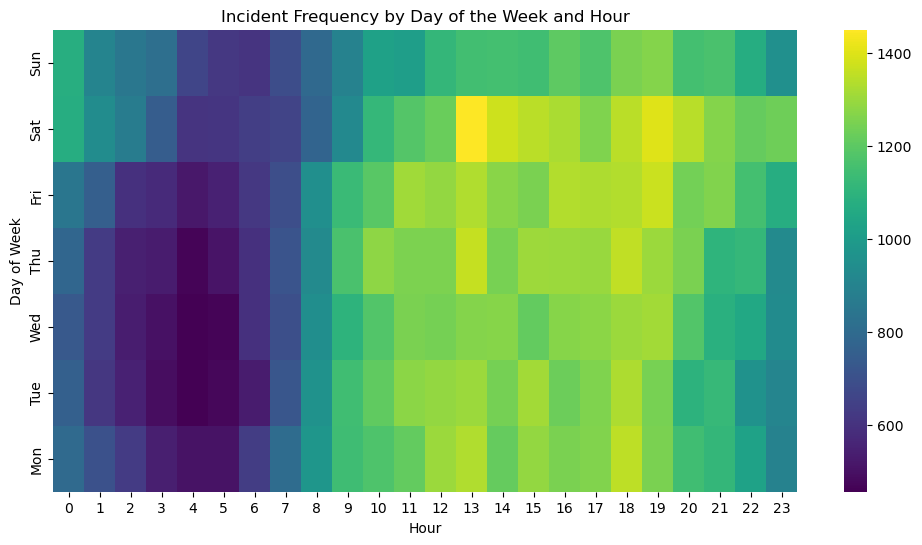

In [16]:
# Plot the heatmap with the desired order of days on the y-axis.
plt.figure(figsize=(12, 6))
plt.title('Incident Frequency by Day of the Week and Hour')
sns.heatmap(dayHour, cmap='viridis', yticklabels=dayOrder)

In [17]:
# Replace integer value for month with their respective three letter abbreviations.
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(dmap)

In [18]:
# Create a new database called dayMonth which tells you number of incidents.
dayMonth = df.groupby(by=['Day of Week','Month']).count()['TFS_Alarm_Time'].unstack()
dayMonth

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Day of Week,,,,,,,,,,,,
Fri,2297,2007,2536,1664,1902,2565,1987,1654,1872,1959,1938,2562
Mon,1630,2511,1797,1612,2623,2025,1819,1540,2274,1878,2486,1853
Sat,2173,1944,2560,1614,2336,2781,1917,1534,2653,1939,2478,1975
Sun,1589,1907,1884,1555,2214,2539,1871,1610,2433,1915,2332,1881
Thu,1662,1916,2423,1664,1788,1921,2599,2015,1906,1971,1877,2470
Tue,1549,2308,1816,1652,2016,1940,1882,1893,2353,2384,1859,1813
Wed,1666,2347,1869,1627,1814,1974,2253,1950,1793,2429,1830,1923


<Axes: xlabel='Month', ylabel='Day of Week'>

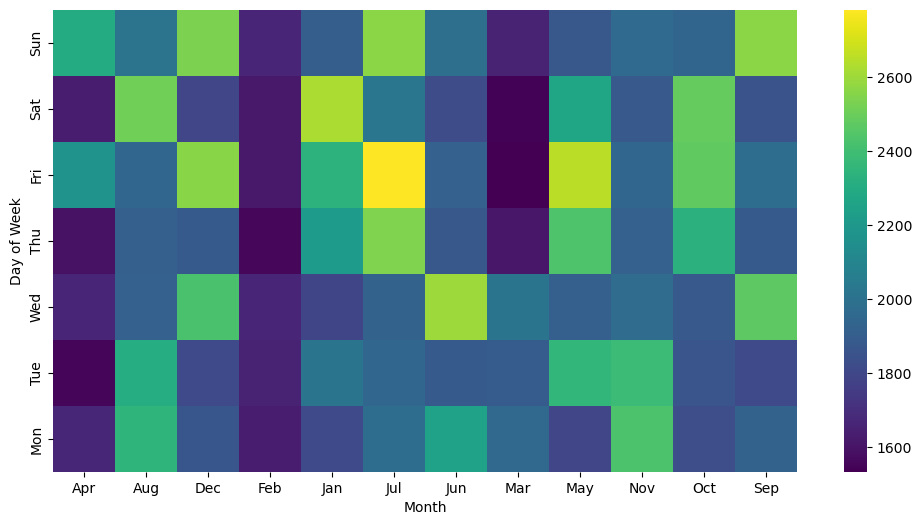

In [19]:
# Create a heatmap for incident frequency by day and month.
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',yticklabels=dayOrder)

In [20]:
# Reorder the columns in dayMonth based on the proper order of months.
monthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dayMonth = dayMonth.reindex(columns=monthOrder)

<Axes: title={'center': 'Incident Frequency by Day of the Week and Month'}, xlabel='Month', ylabel='Day of Week'>

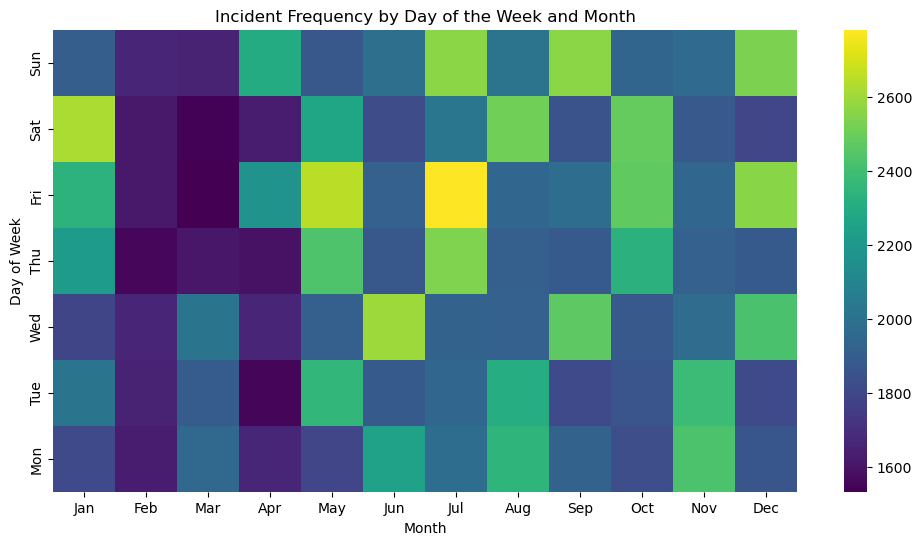

In [21]:
# Plot the heatmap with the desired order of months on the x-axis.
plt.figure(figsize=(12,6))
plt.title('Incident Frequency by Day of the Week and Month')
sns.heatmap(dayMonth, cmap='viridis', yticklabels=dayOrder)

In [22]:
# During what day of the week and hour of the day were the most incidents?
max_incidents_hour = dayHour.stack().idxmax()
print(f"Day and hour with the most incidents: {max_incidents_hour}")

# During what day of the week and which month were the most incidents?
max_incidents_month = dayMonth.stack().idxmax()
print(f"Day and month with the most incidents: {max_incidents_month}")

Day and hour with the most incidents: ('Sat', 13)
Day and month with the most incidents: ('Sat', 'Jul')
